In [217]:
import pandas as pd
import scipy as sc
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics,preprocessing
from sklearn import datasets, linear_model


In [137]:
df15 = pd.read_excel("socioeconomic/2015.xls")
df15['CITY'] = df15['CITY'].str.strip()

df13 = pd.read_excel("socioeconomic/2013.xls")
df13['CITY'] = df13['CITY'].str.strip()

df08 = pd.read_excel("socioeconomic/2008.xls")
df08['CITY'] = df08['CITY'].str.strip()

df06 = pd.read_excel("socioeconomic/2006.xls")
df06['CITY'] = df06['CITY'].str.strip()

df01 = pd.read_excel("socioeconomic/2001.xls")
df01['CITY'] = df01['CITY'].str.strip()

df99 = pd.read_excel("socioeconomic/1999.xls")
df99['CITY'] = df99['CITY'].str.strip()


df = pd.read_csv("KE/knesset21elections.csv")



In [138]:
df15 = df15.replace('..', 0).replace(',','').set_index('CITY')
df15 = df15.dropna(thresh=5) 
df15 = df15.round()
del df15['SYMBOL']

df13 = df13.replace('..', 0).replace(',','').set_index('CITY')
df13 = df13.dropna(thresh=5) 
df13 = df13.round(0)
del df13['SYMBOL']

df08 = df08.replace('..', 0).replace(',','').set_index('CITY')
df08 = df08.dropna(thresh=5) 
df08 = df08.round(0)
del df08['SYMBOL']

df06 = df06.replace('..', 0).replace(',','').set_index('CITY')
df06 = df06.dropna(thresh=5) 
df06 = df06.round(0)
del df06['SYMBOL']

df01 = df01.replace('..', 0).replace(',','').set_index('CITY')
df01 = df01.dropna(thresh=5) 
df01 = df01.round(0)

df99 = df99.replace('..', np.nan).set_index('CITY')
df99 = df99.dropna(thresh=2) 
df99 = df99.round()



In [139]:
df99.columns.values
df01.dtypes


POPULATION                float64
 MEDIAN AGE               float64
DEPENDENCY RATIO          float64
4 CHILDREN FAMILY         float64
RATE OF MOTORIZATION      float64
AVERAGE INCOME            float64
ACADMIC RANK              float64
 SCHOOL RANK              float64
UNDER MIN INCOME          float64
DOUBLE MIN INCOME PLUS    float64
INCOME SUPPORTED          float64
dtype: object

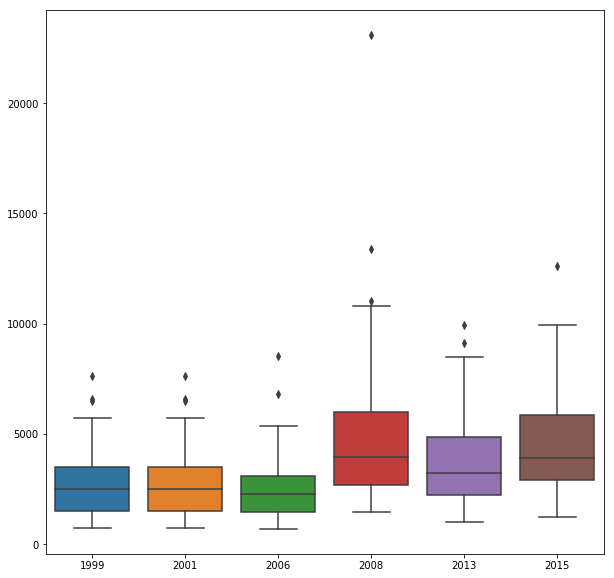

In [140]:
result = pd.concat([df99['AVERAGE INCOME'], df01['AVERAGE INCOME']], axis=1, join_axes=[df01.index])
result = pd.concat([result, df06['AVERAGE INCOME']], axis=1, join_axes=[df01.index])
result = pd.concat([result, df08['AVERAGE INCOME']], axis=1, join_axes=[df01.index])
result = pd.concat([result, df13['AVERAGE INCOME']], axis=1, join_axes=[df01.index])
result = pd.concat([result, df15['AVERAGE INCOME']], axis=1, join_axes=[df01.index])
result.columns = ['1999','2001','2006','2008','2013','2015']

sns.boxplot(data=result);

As it is possible to see above, the gaps between rich and poor are bigger during the last 10 years then before.
is it a symbol for the political map?

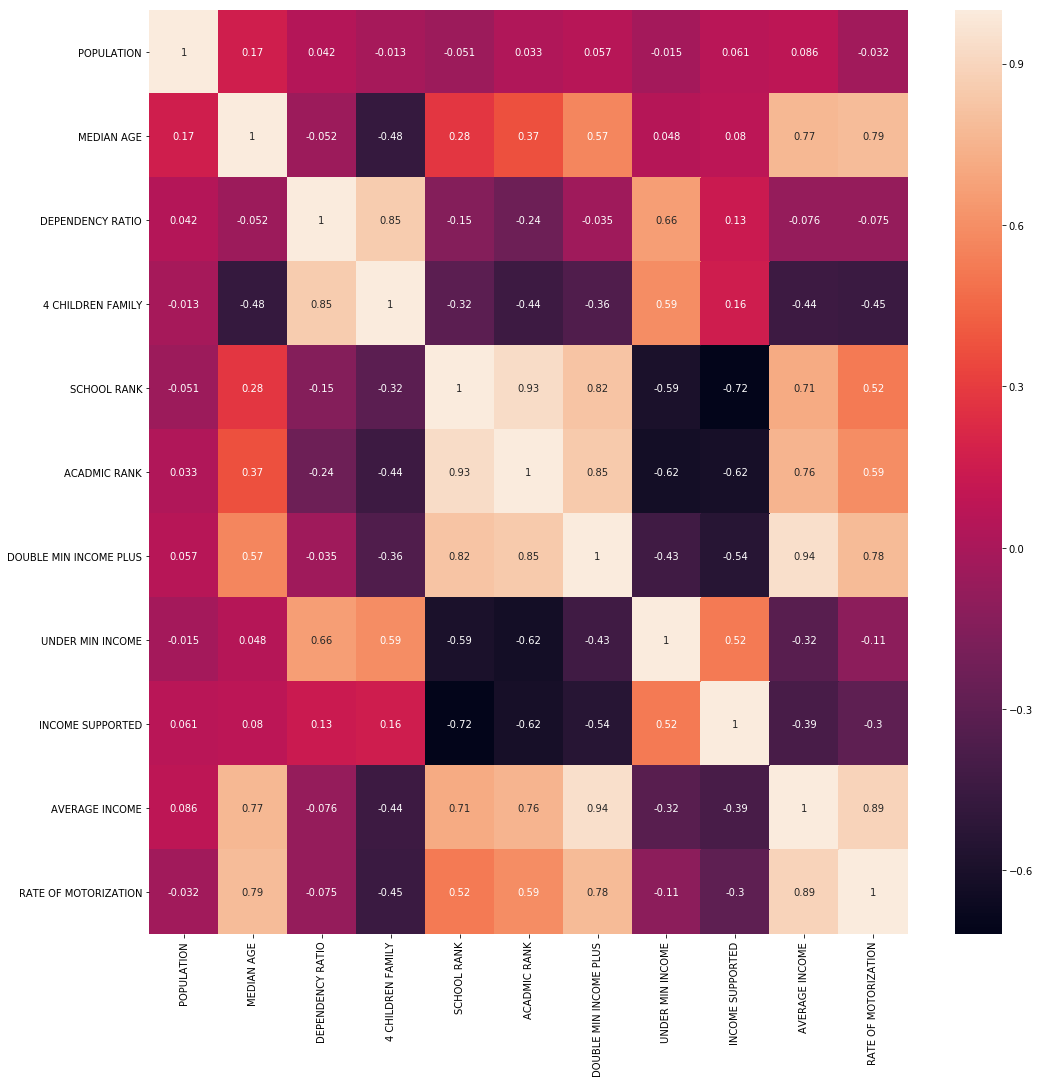

In [202]:
plt.figure(figsize = (17,17))
sb.heatmap(df15.corr(), annot=True);

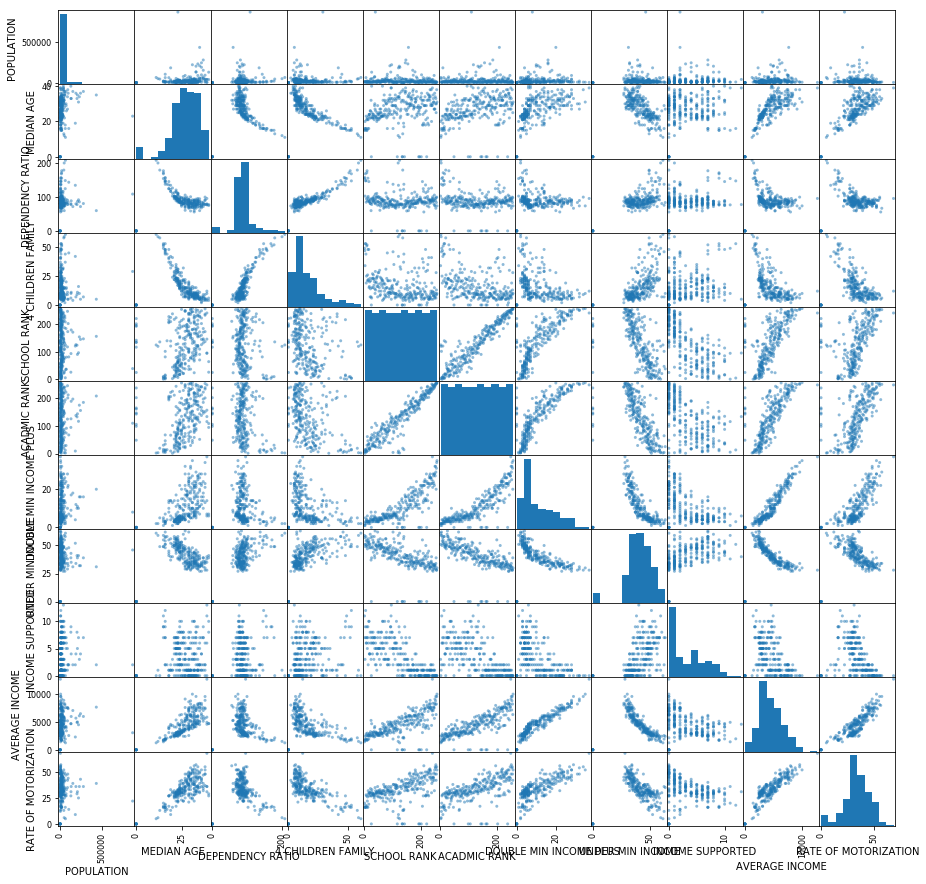

In [204]:
pd.plotting.scatter_matrix(df15,figsize=(15,15));


In [264]:
kn15 = pd.read_csv("KE/knesset20elections.csv", index_col=0, encoding="utf-8")
kn15.columns = kn15.columns.str.replace(' ', '')
df15_labeled = pd.merge(df15, kn15[['Arabs','Left', 'Right','Center', 'Orthodox']],left_index=True, right_index=True)

kn13 = pd.read_csv("KE/knesset19elections.csv", index_col=0, encoding="utf-8")
kn13.columns = kn13.columns.str.replace(' ', '')
df13_labeled = pd.merge(df13, kn13,left_index=True, right_index=True)

kn08 = pd.read_csv("KE/knesset18elections.csv", index_col=0, encoding="utf-8")
kn08.columns = kn08.columns.str.replace(' ', '')
df08_labeled = pd.merge(df08, kn08,left_index=True, right_index=True)

kn06 = pd.read_csv("KE/knesset17elections.csv", index_col=0, encoding="utf-8")
kn06.columns = kn06.columns.str.replace(' ', '')
df06_labeled = pd.merge(df06, kn06,left_index=True, right_index=True)

kn01 = pd.read_csv("KE/knesset16elections.csv", index_col=0, encoding="utf-8")
kn01.columns = kn01.columns.str.replace(' ', '')
df01_labeled = pd.merge(df01, kn01,left_index=True, right_index=True)

kn99 = pd.read_csv("KE/knesset15elections.csv", index_col=0, encoding="utf-8")
kn99.columns = kn99.columns.str.replace(' ', '')
df99_labeled = pd.merge(df99, kn99,left_index=True, right_index=True)

In [265]:
df99_labeled

,POPULATION,MEDIAN AGE,DEPENDENCY RATIO,4 CHILDREN FAMILY,RATE OF MOTORIZATION,AVERAGE INCOME,ACADMIC RANK,SCHOOL RANK,UNDER MIN INCOME,DOUBLE MIN INCOME PLUS,...,סמלישוב,בזב,מצביעים,פסולים,כשרים,Arabs,Left,Right,Center,Orthodox
אבו גוש,5013.0,22.0,102.0,28.0,15.0,1452.0,23.0,33.0,48.0,2.0,...,472,2539,1778,74,1704,647,574,25,177,233
אבו סנאן,10647.0,21.0,102.0,30.0,18.0,1614.0,75.0,43.0,52.0,3.0,...,473,5467,4673,151,4522,2736,484,210,677,357
אבן יהודה,8439.0,27.0,82.0,7.0,38.0,4388.0,181.0,121.0,34.0,18.0,...,182,5554,4610,53,4557,4,2125,1027,796,390
אום אל-פחם,36758.0,19.0,116.0,36.0,16.0,1255.0,30.0,35.0,61.0,1.0,...,2710,18856,14057,302,13755,12484,616,43,79,393
אופקים,23094.0,25.0,104.0,23.0,13.0,1996.0,79.0,47.0,48.0,3.0,...,31,14680,10957,297,10660,25,1386,2397,1844,4408
אור יהודה,27891.0,28.0,75.0,8.0,25.0,3189.0,70.0,94.0,39.0,7.0,...,2400,19283,14267,378,13889,37,2553,4171,1519,4627
אור עקיבא,15309.0,30.0,77.0,10.0,20.0,2614.0,62.0,56.0,47.0,2.0,...,1020,11861,8308,238,8070,26,981,2845,1911,1778
אורנית,5151.0,25.0,77.0,11.0,34.0,4399.0,182.0,165.0,28.0,19.0,...,3760,2675,2281,9,2272,2,678,931,466,89
אזור,9529.0,32.0,72.0,7.0,30.0,3470.0,126.0,146.0,36.0,9.0,...,565,7269,5567,124,5443,7,1806,1482,1044,792
אילת,40685.0,25.0,57.0,6.0,24.0,3797.0,88.0,107.0,43.0,6.0,...,2600,36198,21034,299,20735,129,6686,4940,3975,3040


In [266]:
train_df = pd.DataFrame()
train_df = train_df.append(df13_labeled)
train_df = train_df.append(df08_labeled)
train_df = train_df.append(df06_labeled)
train_df = train_df.append(df01_labeled)
train_df = train_df.append(df99_labeled)
X = train_df[['POPULATION','MEDIAN AGE','DEPENDENCY RATIO','4 CHILDREN FAMILY','RATE OF MOTORIZATION','AVERAGE INCOME','ACADMIC RANK','SCHOOL RANK','UNDER MIN INCOME','DOUBLE MIN INCOME PLUS','INCOME SUPPORTED']]
y = train_df['Right']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=0)

train_df

,MEDIAN AGE,4 CHILDREN FAMILY,ACADMIC RANK,AVERAGE INCOME,Arabs,Center,DEPENDENCY RATIO,DOUBLE MIN INCOME PLUS,DOUBLE MIN INCOME PLUS.1,INCOME SUPPORTED,...,MEDIAN AGE,SCHOOL RANK,בוחרים,בז''ב,בזב,בעליזכותבחירה,כשרים,מצביעים,סמלישוב,פסולים
אבן יהודה,NaN,6.0,232.0,6961.0,16.0,2139.0,85.0,27.0,1.0,NaN,...,NaN,NaN,NaN,NaN,8848.0,NaN,6760.0,6798.0,182,38.0
אום אל-פחם,NaN,26.0,26.0,1791.0,15150.0,22.0,104.0,4.0,5.0,NaN,...,NaN,NaN,NaN,NaN,28254.0,NaN,15844.0,16032.0,2710,188.0
אופקים,NaN,22.0,42.0,2731.0,19.0,639.0,87.0,5.0,9.0,NaN,...,NaN,NaN,NaN,NaN,18364.0,NaN,10735.0,10879.0,31,144.0
אור יהודה,NaN,8.0,83.0,4089.0,38.0,2705.0,72.0,9.0,3.0,NaN,...,NaN,NaN,NaN,NaN,25851.0,NaN,16019.0,16278.0,2400,259.0
אור עקיבא,NaN,9.0,82.0,3637.0,4.0,716.0,72.0,6.0,7.0,NaN,...,NaN,NaN,NaN,NaN,14128.0,NaN,7282.0,7411.0,1020,129.0
אורנית,NaN,10.0,213.0,6473.0,3.0,1263.0,78.0,25.0,0.0,NaN,...,NaN,NaN,NaN,NaN,5049.0,NaN,3979.0,3999.0,3760,20.0
אזור,NaN,7.0,121.0,4831.0,6.0,1405.0,68.0,13.0,2.0,NaN,...,NaN,NaN,NaN,NaN,9183.0,NaN,6136.0,6204.0,565,68.0
אילת,NaN,7.0,57.0,4577.0,114.0,4032.0,58.0,8.0,3.0,NaN,...,NaN,NaN,NaN,NaN,45466.0,NaN,19327.0,19582.0,2600,255.0
אכסאל,NaN,23.0,85.0,2468.0,2969.0,49.0,96.0,6.0,3.0,NaN,...,NaN,NaN,NaN,NaN,7715.0,NaN,3560.0,3606.0,478,46.0
אליכין,NaN,14.0,125.0,4132.0,2.0,194.0,83.0,11.0,1.0,NaN,...,NaN,NaN,NaN,NaN,2295.0,NaN,1676.0,1688.0,41,12.0


In [223]:
lm = linear_model.LinearRegression()
model = lm.fit(xtrain, ytrain)
predictions = lm.predict(Xtest)
plt.scatter(ytest, predictions)
plt.xlabel('true values')
plt.ylabel('prediction')

NameError: name 'X_test' is not defined

In [267]:
train_df = pd.DataFrame()
train_df = train_df.append(df13_labeled)
train_df.columns.values


array(['POPULATION', 'MEDIAN AGE', 'DEPENDENCY RATIO',
       '4 CHILDREN FAMILY', 'SCHOOL RANK', 'ACADMIC RANK',
       'DOUBLE MIN INCOME PLUS', 'UNDER MIN INCOME',
       'DOUBLE MIN INCOME PLUS.1', 'AVERAGE INCOME',
       'RATE OF MOTORIZATION',
       u'\u05e1\u05de\u05dc\u05d9\u05e9\u05d5\u05d1',
       u'\u05d1\u05d6\u05d1',
       u'\u05de\u05e6\u05d1\u05d9\u05e2\u05d9\u05dd',
       u'\u05e4\u05e1\u05d5\u05dc\u05d9\u05dd',
       u'\u05db\u05e9\u05e8\u05d9\u05dd', u'Arabs', u'Left', u'Right',
       u'Center', u'Orthodox'], dtype=object)

In [268]:
train_df = train_df.append(df08_labeled)
train_df.columns.values


array(['4 CHILDREN FAMILY', 'ACADMIC RANK', 'AVERAGE INCOME', u'Arabs',
       u'Center', 'DEPENDENCY RATIO', 'DOUBLE MIN INCOME PLUS',
       'DOUBLE MIN INCOME PLUS.1', 'INCOME SUPPORTED', u'Left',
       'MEDIAN AGE', u'Orthodox', 'POPULATION', 'RATE OF MOTORIZATION',
       u'Right', 'SCHOOL RANK', 'UNDER MIN INCOME',
       u"\u05d1\u05d6''\u05d1", u'\u05d1\u05d6\u05d1',
       u'\u05db\u05e9\u05e8\u05d9\u05dd',
       u'\u05de\u05e6\u05d1\u05d9\u05e2\u05d9\u05dd',
       u'\u05e1\u05de\u05dc\u05d9\u05e9\u05d5\u05d1',
       u'\u05e4\u05e1\u05d5\u05dc\u05d9\u05dd'], dtype=object)